In [1]:
import pandas as pd
import re

### What this notebook is for:
Based on the annual soda consumption per capita data, I intend to calculate how much soda countries around the world consume annually.

# Get Consumption data

In [2]:
# Source: https://www.statista.com/statistics/505794/cds-per-capita-consumption-in-worlds-top-ten-population-countries/
consumption = pd.read_csv('consumption.csv')
consumption

,country,servings
0,Mexico,634
1,United States,618
2,Brazil,280
3,Japan,116
4,Russia,108
5,China,56
6,Nigeria,49
7,Pakistan,49
8,Indonesia,18
9,India,18


# Get population data

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
pop_tables = pd.read_html(url)
pop=pop_tables[0]
pop.head()

,Country / Area,UN continental region[4],UN statistical subregion[4],Population (1 July 2018),Population (1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


In [4]:
# Getting the columns I need
pop = pop[['Country / Area','Population (1 July 2019)']]

In [5]:
# Rename columns
pop = pop.set_axis(['country','population'],axis=1,inplace=False)
pop.head()

/var/folders/0h/2v5mxpvs49s0_gs3lqjt474h0000gn/T/ipykernel_95374/897450024.py:1: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  pop = pop.set_axis(['country','population'],axis=1,inplace=False)


,country,population
0,China[a],1433783686
1,India,1366417754
2,United States,329064917
3,Indonesia,270625568
4,Pakistan,216565318


In [6]:
# Data cleaning
pop['country']=pop.country.str.replace('[a]','',regex=False)
pop.head()

,country,population
0,China,1433783686
1,India,1366417754
2,United States,329064917
3,Indonesia,270625568
4,Pakistan,216565318


# Merging data and analysis

In [7]:
merged = consumption.merge(pop,how='left',on='country')
merged.head(2)

,country,servings,population
0,Mexico,634,127575529
1,United States,618,329064917


In [8]:
# calculate the amount of servings consumed by whole country in total
merged['total'] = merged['servings']*merged['population']
merged.head(2)

,country,servings,population,total
0,Mexico,634,127575529,80882885386
1,United States,618,329064917,203362118706


In [9]:
# convert the total to gallon
merged['per_capita_gallon']=merged['servings']*8/128
merged['total_gallon']=round(merged['total']*8/128)

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [11]:
# Convert to see the amount will fill how many Olympics swimming pool
pool_gallon = 660000
merged['pool_filled'] = merged['total_gallon']/pool_gallon
merged.head(2)

,country,servings,population,total,per_capita_gallon,total_gallon,pool_filled
0,Mexico,634,127575529,80882885386,39.62500,5055180337.00000,7659.36415
1,United States,618,329064917,203362118706,38.62500,12710132419.00000,19257.77639


In [20]:
# convert total gallon to billion gallon
merged['million_gallon'] = merged['total_gallon']/1000000000
merged

,country,servings,population,total,per_capita_gallon,total_gallon,pool_filled,lake_filled,million_gallon
0,Mexico,634,127575529,80882885386,39.62500,5055180337.00000,7659.36415,5.05518,5.05518
1,United States,618,329064917,203362118706,38.62500,12710132419.00000,19257.77639,12.71013,12.71013
2,Brazil,280,211049527,59093867560,17.50000,3693366722.00000,5596.01018,3.69337,3.69337
3,Japan,116,126860301,14715794916,7.25000,919737182.00000,1393.54118,0.91974,0.91974
4,Russia,108,145872256,15754203648,6.75000,984637728.00000,1491.87535,0.98464,0.98464
5,China,56,1433783686,80291886416,3.50000,5018242901.00000,7603.39833,5.01824,5.01824
6,Nigeria,49,200963599,9847216351,3.06250,615451022.00000,932.50155,0.61545,0.61545
7,Pakistan,49,216565318,10611700582,3.06250,663231286.00000,1004.89589,0.66323,0.66323
8,Indonesia,18,270625568,4871260224,1.12500,304453764.00000,461.29358,0.30445,0.30445
9,India,18,1366417754,24595519572,1.12500,1537219973.00000,2329.12117,1.53722,1.53722


<AxesSubplot: ylabel='country'>

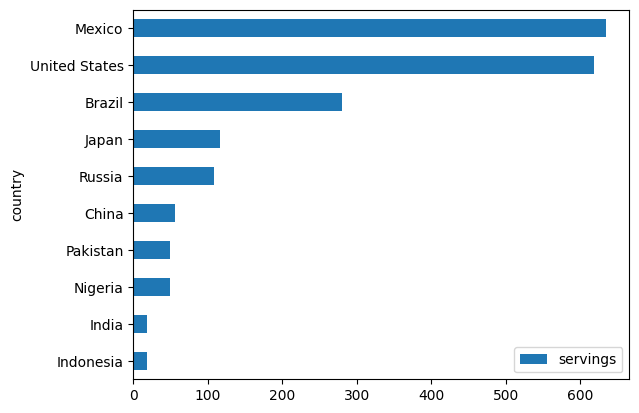

In [21]:
merged.sort_values(by='servings').plot(kind='barh',ylabel='country',y='servings',x='country')

<AxesSubplot: ylabel='country'>

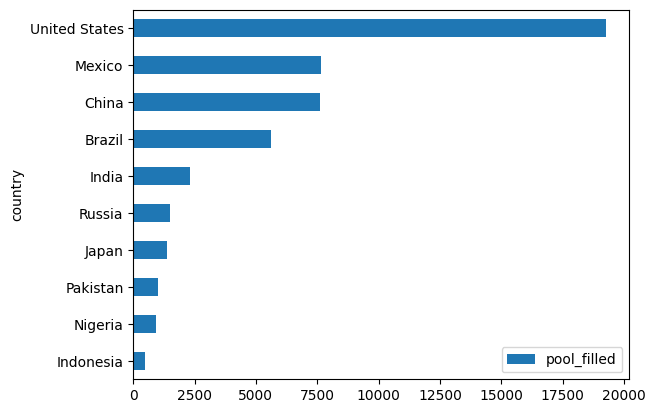

In [22]:
merged.sort_values(by='pool_filled').plot(kind='barh',ylabel='country',y='pool_filled',x='country')

In [23]:
merged.to_csv("soda_consumption.csv", index=False)